In [ ]:
# Installing Kaggle libraries and required items

!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

## Importing Datasets from Kaggle into Workspace

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 65.6MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.3MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 18.7MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.6MB/s]


## Importing Dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

## Data Analysis and Pre-Processing (Train.csv)

### Identify and Remove Column with >40% Missing Data

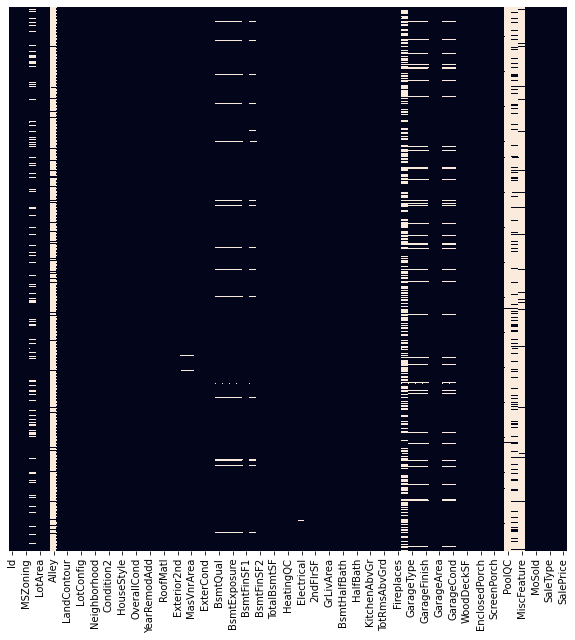

In [ ]:
# Let's illustrate the data using heatmap, the white patches indicates missing data

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize      = (10,10))

sns.heatmap(df.isna(),
            yticklabels = False,
            cbar        = False)

In [ ]:
# Initialise the definition of missing data
percentMissing = (df.isna().sum()/df.shape[0])*100

# Column above 40% missing data to drop
hi_missing     = percentMissing[percentMissing > 40]
hi_missing

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [ ]:
# Drop Column with Missing data above 40%
X = df.drop(["Alley",
             "PoolQC",
             "Fence",
             "MiscFeature",
             "FireplaceQu"],
            axis=1)

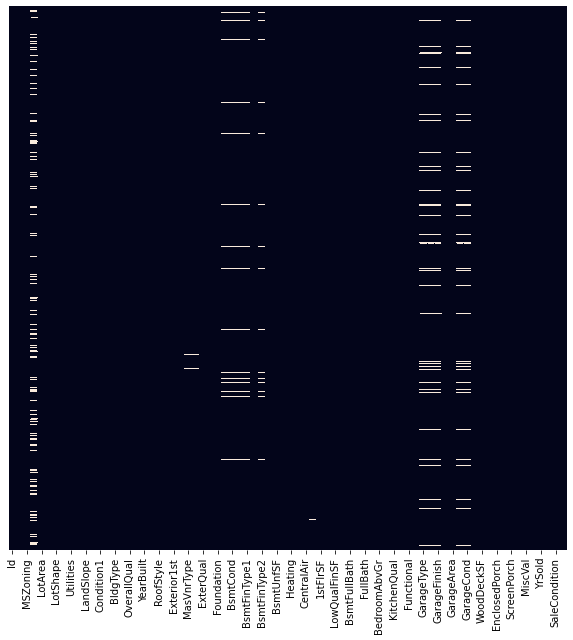

In [ ]:
# Second Verification

plt.figure(figsize      =(10,10))

sns.heatmap(X.isna(),
            yticklabels = False,
            cbar        = False)

### Replacing missing numerical values with mean

In [ ]:
X = X.fillna(X.mean())

### Replacing missing categorical values

In [ ]:
X = X.fillna(X.mode())

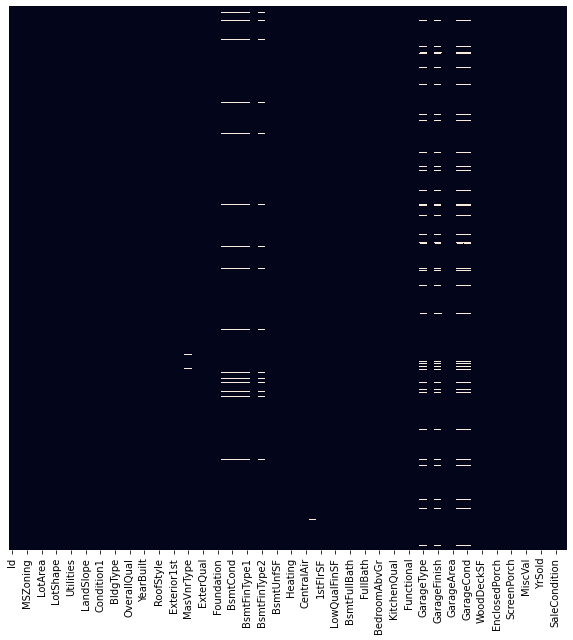

In [ ]:
# Third Verification

plt.figure(figsize      = (10,10))

sns.heatmap(X.isna(),
            yticklabels = False,
            cbar        = False)

###Handling Missing Value Feature-by-Feature

In [ ]:
# For some reason, generally replace all missing values does not work, So I need to handle one by one


X[['MasVnrType']].fillna('None', inplace=True)
X['BsmtExposure'].fillna('No', inplace=True)
X['BsmtFinType2'].fillna('Unf', inplace=True)
X['Electrical'].fillna('SBrkr', inplace=True)

X.dropna(subset=['BsmtQual', 
                 'BsmtCond', 
                 'BsmtFinType1',
                 'GarageType', 
                 'GarageYrBlt', 
                 'GarageFinish', 
                 'GarageQual', 
                 'GarageCond',
                 'MasVnrType', 
                 'MasVnrArea'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1341 non-null   int64  
 1   MSSubClass     1341 non-null   int64  
 2   MSZoning       1341 non-null   object 
 3   LotFrontage    1341 non-null   float64
 4   LotArea        1341 non-null   int64  
 5   Street         1341 non-null   object 
 6   LotShape       1341 non-null   object 
 7   LandContour    1341 non-null   object 
 8   Utilities      1341 non-null   object 
 9   LotConfig      1341 non-null   object 
 10  LandSlope      1341 non-null   object 
 11  Neighborhood   1341 non-null   object 
 12  Condition1     1341 non-null   object 
 13  Condition2     1341 non-null   object 
 14  BldgType       1341 non-null   object 
 15  HouseStyle     1341 non-null   object 
 16  OverallQual    1341 non-null   int64  
 17  OverallCond    1341 non-null   int64  
 18  YearBuil

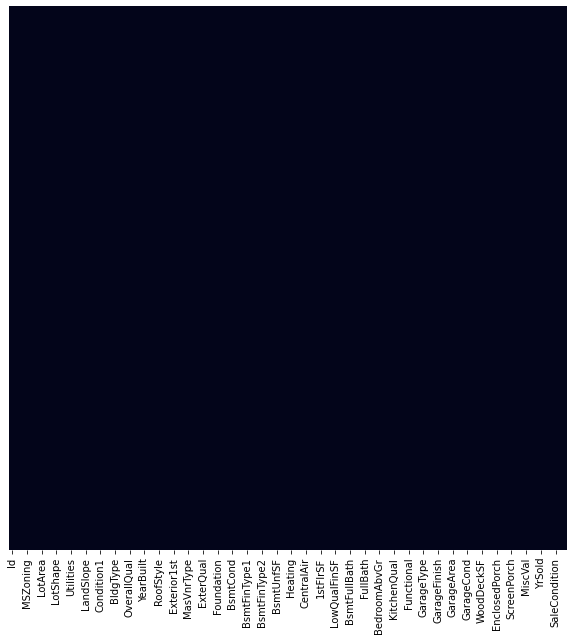

In [ ]:
# Final check

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(X.isna(),
            yticklabels = False,
            cbar = False)

### Pre-Processing Categorical Features

In [ ]:
# View X with categorical datatype
X.select_dtypes(include=['object'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
# List all categorical columns

cat_col = ['MSZoning',	  'Street',	    'LotShape',	  'LandContour',	'Utilities',	  'LotConfig',	'LandSlope',	  'Neighborhood',
           'Condition1',	'Condition2',	'BldgType',	  'HouseStyle',	  'RoofStyle',	  'RoofMatl',	  'Exterior1st',	'Exterior2nd',
           'MasVnrType',	'ExterQual',	'ExterCond',	'Foundation',	  'BsmtQual',	    'BsmtCond',	  'BsmtExposure',	'BsmtFinType1',	'BsmtFinType2',	
           'Heating',	    'HeatingQC',	'CentralAir',	'Electrical',	  'KitchenQual',	'Functional',	'GarageType',	  'GarageFinish',
           'GarageQual',	'GarageCond',	'PavedDrive',	'SaleType',	    'SaleCondition']

In [ ]:
# Count total columns
len(cat_col)

38

## Data Analysis and Pre-Processing (Test.csv)

In [ ]:
# Importimg Test Set
df_test = pd.read_csv("test.csv")

In [ ]:
# Observe the Shape of the Test Set
df_test.shape

(1459, 80)

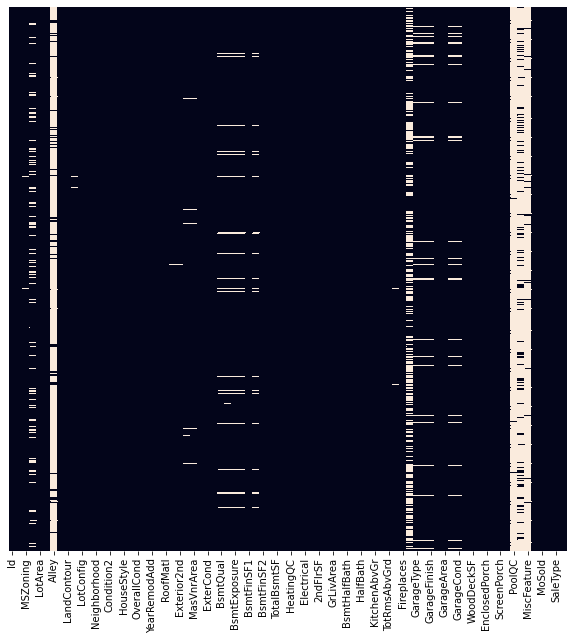

In [ ]:
# Visualize missing values in Test Set

plt.figure(figsize      = (10,10))

sns.heatmap(df_test.isna(),
            yticklabels = False,
            cbar        = False)

### Drop columns and replace NaN

In [ ]:
# Fill those NaN with mean and mode (categorical)

df_test = df_test.fillna(df_test.mean())
df_test = df_test.fillna(df_test.mode())

In [ ]:
# Drop Column with Missing data above 40%
df_test = df_test.drop(["Alley",
             "PoolQC",
             "Fence",
             "MiscFeature",
             "FireplaceQu"],
            axis=1)

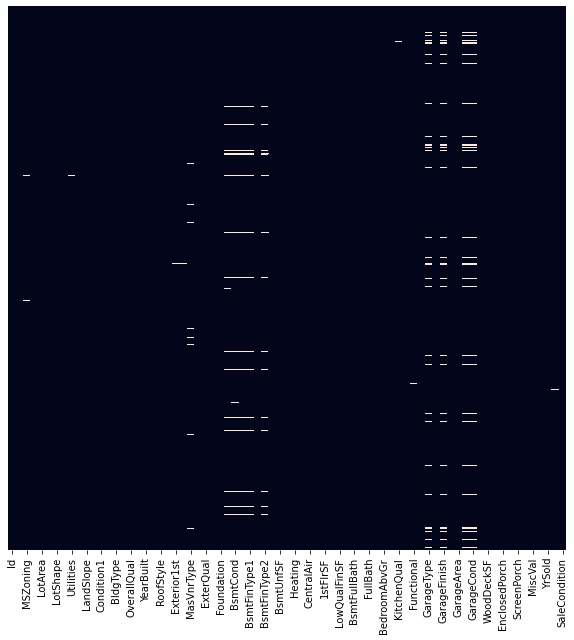

In [ ]:
# Second Verification

plt.figure(figsize      = (10,10))

sns.heatmap(df_test.isna(),
            yticklabels = False,
            cbar        = False)

### Handling Missing Values Feature-by-Feature

In [ ]:
df_test[['MasVnrType']].fillna('None',                            inplace = True)
df_test['BsmtExposure'].fillna('No',                              inplace = True)
df_test['BsmtFinType2'].fillna('Unf',                             inplace = True)
df_test['Electrical'].fillna('SBrkr',                             inplace = True)
df_test['Functional'].fillna(df_test['Functional'].mode()[0],     inplace = True)
df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0],   inplace = True)

df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])


'''
df_test.dropna(subset=['GarageType', 
                 'GarageYrBlt', 
                 'GarageFinish', 
                 'GarageQual', 
                 'GarageCond'], inplace = True)

df_test.dropna(subset=['BsmtQual', 
                 'BsmtCond', 
                 'BsmtFinType1'], inplace = True)

df_test.dropna(subset=['MasVnrType', 
                 'MasVnrArea'], inplace=True)

'''
  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


"\ndf_test.dropna(subset=['GarageType', \n                 'GarageYrBlt', \n                 'GarageFinish', \n                 'GarageQual', \n                 'GarageCond'], inplace = True)\n\ndf_test.dropna(subset=['BsmtQual', \n                 'BsmtCond', \n                 'BsmtFinType1'], inplace = True)\n\ndf_test.dropna(subset=['MasVnrType', \n                 'MasVnrArea'], inplace=True)\n\n"

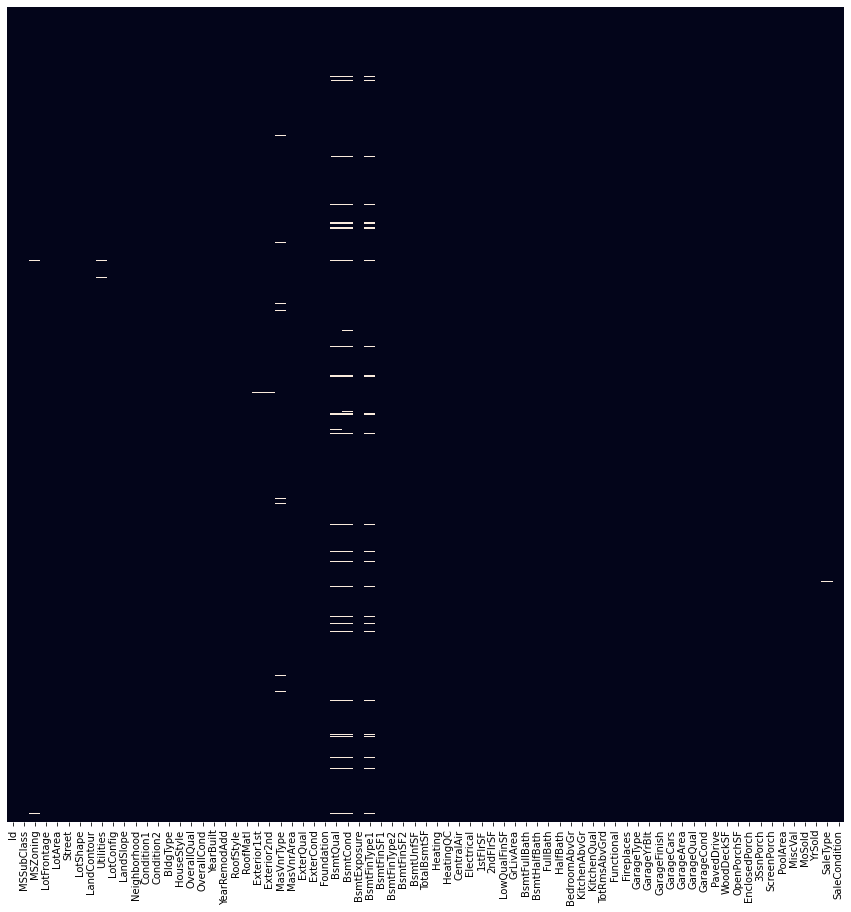

In [ ]:
# Third Verification

plt.figure(figsize      = (15,15))

sns.heatmap(df_test.isna(),
            yticklabels = False,
            cbar        = False)

In [ ]:
nan_col_test = df_test.isna().sum()
nan_col_test

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 75, dtype: int64

In [ ]:
df_test.shape

(1459, 75)

In [ ]:
X.shape

(1341, 76)

### Concatenate both Train and Test set

In [ ]:
'''
- It's a long step just to handle feature one-by-one again, so I just moved on
- As we want to handle categorical variables later on, we concatenate both Train set and Test Set
- Recall Train data : X
-        Test data  : df_test

'''

combi_df = pd.concat([X,
                      df_test],
                     axis = 0)


In [ ]:
combi_df.shape

(2800, 76)

In [ ]:
combi_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.000000,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000000,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Attchd,1977.721217,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.000000,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=combi_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(combi_df[fields],drop_first=True)
        
        combi_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([combi_df,df_final],axis=1)
        
    return df_final

In [ ]:
final_df = category_onehot_multcols(cat_col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
final_df.shape

(2667, 230)

In [ ]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.drop(['Id'],axis = 1, inplace=True)

In [ ]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,...,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasW,Grav,OthW,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,1,...,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,80.0,13384,5,5,1969,1979,194.0,119.0,344.0,641.0,1104.0,1360,0,0,1360,1.0,0.0,1,0,3,1,8,1,1969.0,1.0,336.0,160,0,0,0,0,0,0,5,2006,NaN,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1452,160,21.0,1533,4,5,1970,1970,0.0,408.0,0.0,138.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1970.0,1.0,286.0,0,0,0,0,0,0,0,12,2006,NaN,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,NaN,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,NaN,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Re-extract test and training set

In [ ]:
# Re-extract test and training set

df_Train  = final_df.iloc[:1341,:]
df_Test   = final_df.iloc[1341:,:]

In [ ]:
X_train   = df_Train.drop(['SalePrice'],axis=1)
y_train   = df_Train['SalePrice']

## Data Analysis as a Whole

### Feature Correlation

In [ ]:

corr_mat = final_df.corr()

'''
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,
            cmap = "Blues",
            annot=True)


corr_mat
'''

'\nplt.figure(figsize=(10,10))\nsns.heatmap(corr_mat,\n            cmap = "Blues",\n            annot=True)\n\n\ncorr_mat\n'

In [ ]:
# Correlation with Output Variables
corr_output = abs(corr_mat["SalePrice"])

#List out input with highest and lowest correlations
hi_corr = corr_output[corr_output > 0.6]
lo_corr = corr_output[corr_output < 0.20]

print("[Correlation above 0.7]\n\n",hi_corr,"\n\n[Correlation below 0.2]\n\n",lo_corr)

[Correlation above 0.7]

 OverallQual    0.783641
TotalBsmtSF    0.600015
1stFlrSF       0.604934
GrLivArea      0.711438
GarageCars     0.640611
GarageArea     0.608128
SalePrice      1.000000
Name: SalePrice, dtype: float64 

[Correlation below 0.2]

 Id             0.031536
MSSubClass     0.080425
OverallCond    0.108963
BsmtFinSF2     0.028715
BsmtUnfSF      0.193387
                 ...   
Oth            0.024522
AdjLand        0.021075
Alloca         0.007828
Family         0.058094
Normal         0.171327
Name: SalePrice, Length: 127, dtype: float64


##Train the model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [ ]:
# We call our model as "regressor"
regressor = XGBRegressor()


# Train the "regressor"
regressor.fit(X_train, y_train)

# Perform 10-fold cross-validation
scores = cross_val_score(estimator = regressor,
                         scoring   ='neg_root_mean_squared_error', 
                         X         = X_train, 
                         y         = y_train,
                         cv        = 10);

[15:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
scores

array([-21806.39331432, -24179.66711232, -20578.84730728, -37253.93159931,
       -30780.74092923, -24063.95631154, -28249.28014377, -24159.97949977,
       -32840.25313612, -24333.00211874])

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Predict the SalePrice from test.csv

In [ ]:
y_pred = regressor.predict(df_Test)

In [ ]:
y_pred = pd.DataFrame(y_pred,columns=["SalePrice"])

In [ ]:
y_pred.to_excel("XGB_Prediction.xlsx")